## Steps Involved
- Read dataset and make it in proper format.

- Encode labels

- Convert all cases to lower

- Remove punctuations

- Remove Stopwords

- Check stats of messages

- Convert all texts into vectors

- Import classifier

- Train and test

- Check the accuracy/confusion matrix.

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Code to display rows and column borders

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# Code to hide warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Importing DataSet

In [8]:
df = pd.read_csv("spam.csv")

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# we can drop the Unnamed columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Data Description:

- A total of 5572 entries in the data set

- 2 column names

- Data types include Objects

- No null values in the data set

In [13]:
# Null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
# Value Counts

print("Value Counts of Spam and ham -->",'\n' ,df["v1"].value_counts())

Value Counts of Spam and ham --> 
 ham     4825
spam     747
Name: v1, dtype: int64


In [15]:
# renaming the columns
df.rename(columns={"v1":"Label","v2":"message"},inplace=True)

In [16]:
df.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Creatinga new column named length to get the string length
df["length"] = df["message"].str.len()

In [18]:
df.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# replacing ham with 0 and spam with 1
df["Label"].replace({"ham":0,"spam":1},inplace=True)

In [20]:
df.head()

,Label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Converting all messages to lower case

In [21]:
df["message"] = df["message"].str.lower()

In [22]:
df.head()

,Label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


### Regular Expressions

#### Replacing Email, URLS, Currency Symbols, phone numbers, numbers

In [23]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

####  Replacing punctuation, Replace whitespace, Remove leading and trailing whitespace

In [24]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [25]:
df.head()

,Label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


### Removing Stopwords

In [26]:
# importing string
import string

# importing nltk
import nltk

In [27]:
# importing stopwords

from nltk.corpus import stopwords

In [28]:
# Extracting some extra text shortforms with the help of selenium

In [29]:
#Importing Libraries
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

In [30]:
# Executing the chromedriver.exe file
driver = webdriver.Chrome(r"C:\Users\charl\Desktop\Study\DataTrained\Internship\Selenium\driver\chromedriver.exe")                                       

In [31]:
# Url for smart words
url = "https://www.smart-words.org/abbreviations/text.html"
driver.get(url)

In [32]:
text_SF = []

for i in driver.find_elements_by_xpath("//td[@class='tre1a trsz1']"):
    
    text_SF.append(i.text)

In [33]:
len(text_SF)

150

In [34]:
# Using map function
out = map(lambda x:x.lower(), text_SF)
  
# Converting it into list
my_words = list(out)

In [35]:
len(my_words)

150

In [36]:
list_1 = ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

In [37]:
for i in list_1:
    
    my_words.append(i)

In [38]:
len(my_words)

159

In [39]:
# create a variable name stop word

stop_words = set(stopwords.words('english') + my_words)

In [40]:
df.head()

,Label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [41]:
df["message"] = df["message"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))                     

In [42]:
df.head()

,Label,message,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif oni,29
2,1,free entry numbr wkly comp win fa cup final tk...,155
3,0,dun say early hor c already say,49
4,0,nah think goes usf lives around though,61


In [43]:
df["Clean_length"] = df["message"].str.len() 

In [44]:
df.head()

,Label,message,length,Clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [45]:
# Total length removal
print ('Orignal Length', df["length"].sum())
print ('Clean Length', df["Clean_length"].sum())

Orignal Length 446085
Clean Length 296647


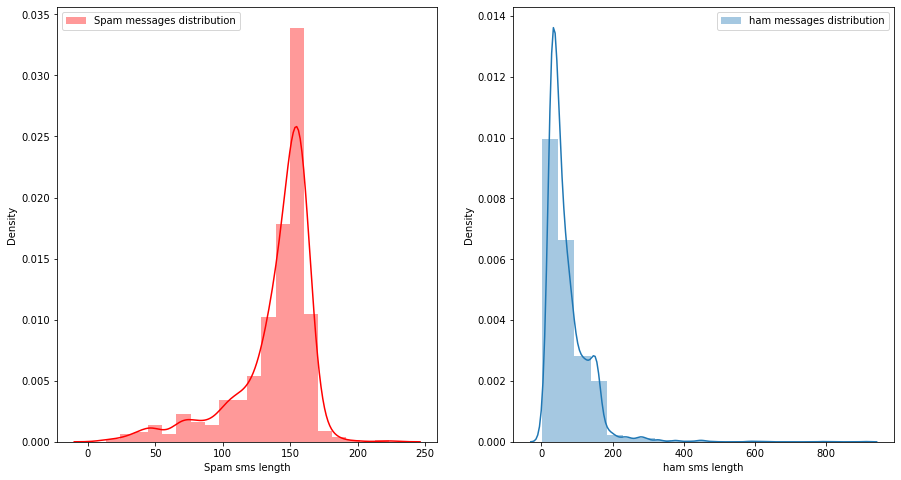

In [48]:
# Message distribution BEFORE cleaning

f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['Label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

We can clearly observe that Spam messages have longer lengths as compared to ham messages.

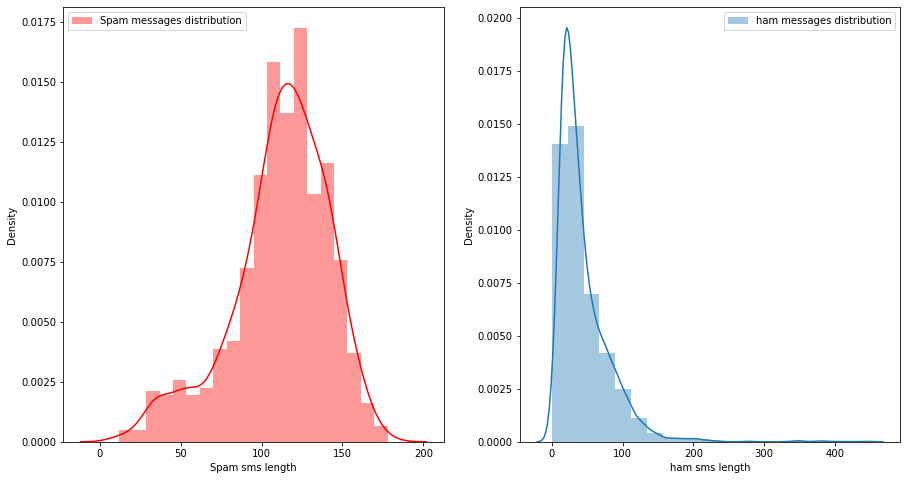

In [51]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['Label']==1]['Clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['Clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [52]:
# Loud words in spam 
from wordcloud import WordCloud

In [55]:
spam_messages = df["message"][df["Label"] == 1]

In [56]:
# making spam cloud
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=24).generate(' '.join(spam_messages))

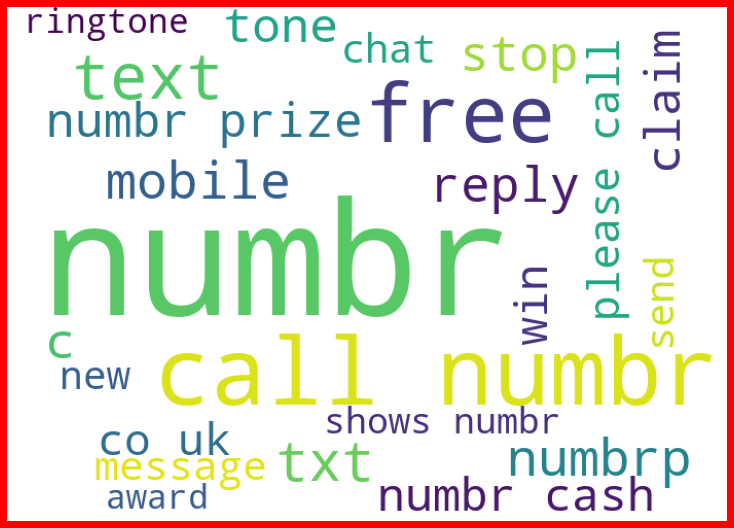

In [57]:
# spam cloud words
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [58]:
ham_messages = df["message"][df["Label"] == 0]

In [60]:
# making ham cloud
ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=24).generate(' '.join(ham_messages))

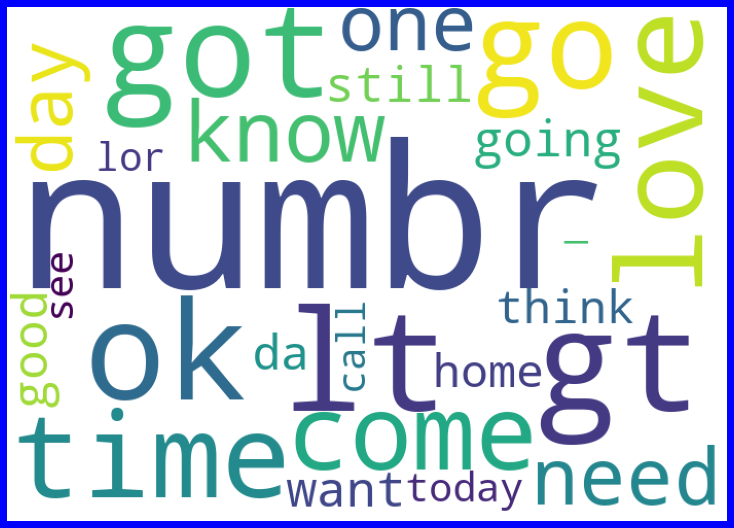

In [61]:
# ham cloud words
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [62]:
# 1. Convert text into vectors using TF-IDF


# 2. Instantiate MultinomialNB classifier

# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
tf_vec = TfidfVectorizer()

In [65]:
features = tf_vec.fit_transform(df["message"])

In [67]:
X = features

In [70]:
y = df["Label"]

In [72]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

In [74]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [75]:
X_train.shape

(3900, 7771)

In [76]:
X_test.shape

(1672, 7771)

In [77]:
y_train.shape

(3900,)

In [78]:
y_test.shape

(1672,)

In [79]:
Nb = MultinomialNB()

In [80]:
Nb.fit(X_train,y_train)

MultinomialNB()

In [81]:
Nb.score(X_train,y_train)

0.9797435897435898

In [82]:
Nb.score(X_test,y_test)

0.9599282296650717

In [83]:
y_pred = Nb.predict(X_test)

In [84]:
print(accuracy_score(y_pred,y_test))
print("\n")
print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))

0.9599282296650717


[[1434   67]
 [   0  171]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1501
           1       0.72      1.00      0.84       171

    accuracy                           0.96      1672
   macro avg       0.86      0.98      0.91      1672
weighted avg       0.97      0.96      0.96      1672



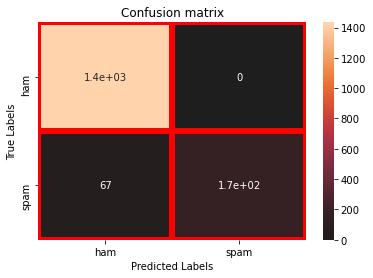

In [85]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()